**CO2 EMMISION DATA WITH PANDAS** 

In [1]:
import pandas as pd

In [70]:
co2data = pd.read_csv("co2_emission.csv")

In [71]:
co2data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [72]:
co2data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


<u>**DATAFRAME TECHNICAL ATTRIBUTES**</u>

 - Entity: Refers to country
 - Code: Abbreviation for country name 
 - Year : As name implies represents the year in question
 - Annual CO₂ emissions (tonnes ) : Describes the amount of CO2 emitted  given period in Metric Tonnes for the country in question.
 
*Note : All columns seem to be complete except for the Code column which seems to have **2,207 missing values**. Although this is still a realization at almost scratch level it is worthy of note. Further interaction might reveal more reason*

In [73]:
co2data.describe()

,Year,Annual CO₂ emissions (tonnes )
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


In [74]:
co2data.describe(include = ["O"])

,Entity,Code
count,20853,18646
unique,233,222
top,World,GBR
freq,267,267


In [75]:
pd.set_option("display.max_rows", 10, "display.max_columns", 10)

# co2data.groupby("Entity").count()

In [76]:
# co2data[co2data.Entity == "Americas (other)"]

In [77]:
pd.set_option("display.max_rows", 50, "display.max_columns", 50)
co2data.groupby("Entity").sum()

,Year,Annual CO₂ emissions (tonnes )
Entity,,
Afghanistan,136827,1.785029e+08
Africa,503028,4.311757e+10
Albania,167875,2.772782e+08
Algeria,211998,4.107870e+09
Americas (other),503028,9.864116e+10
...,...,...
Wallis and Futuna Islands,34153,4.295732e+05
World,503028,1.575244e+12
Yemen,134878,6.194328e+08


In [78]:
co2data["CO₂ emissions (Kilo-tonnes )"] = (co2data["Annual CO₂ emissions (tonnes )"]/1000000).round(2)
# Our emmisions are now converted into kilo-tonnes

In [90]:
# FILTER ONLY REQUIRED COLUMNS AND OMIT THE Annual CO₂ emissions (tonnes ) COLUMN
co2data = co2data[["Entity", "Code", "Year", "CO₂ emissions (Kilo-tonnes )"]]

In [95]:
sum_of_years = co2data.groupby("Entity").sum().reset_index()

In [89]:
sum_of_years

,Year,CO₂ emissions (Kilo-tonnes )
Entity,,
Afghanistan,136827,178.46
Africa,503028,43117.59
Albania,167875,277.23
Algeria,211998,4107.85
Americas (other),503028,98640.98
...,...,...
Wallis and Futuna Islands,34153,0.44
World,503028,1575244.36
Yemen,134878,619.42


In [96]:
sorted_total_emmisions = sum_of_years.sort_values("CO₂ emissions (Kilo-tonnes )", ascending = False)

In [102]:
continent_only_mask = sorted_total_emmisions["Entity"].str.contains("other") # FILTER ONLY CONTINENTS USING THE KEYWORD OTHER

In [103]:
sorted_total_emmisions[continent_only_mask]

,Entity,Year,CO₂ emissions (Kilo-tonnes )
13,Asia and Pacific (other),503028,178057.26
71,Europe (other),503028,157540.16
4,Americas (other),503028,98640.98


In [108]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [121]:
# co2data[co2data["Entity"] == "Europe (other)"]

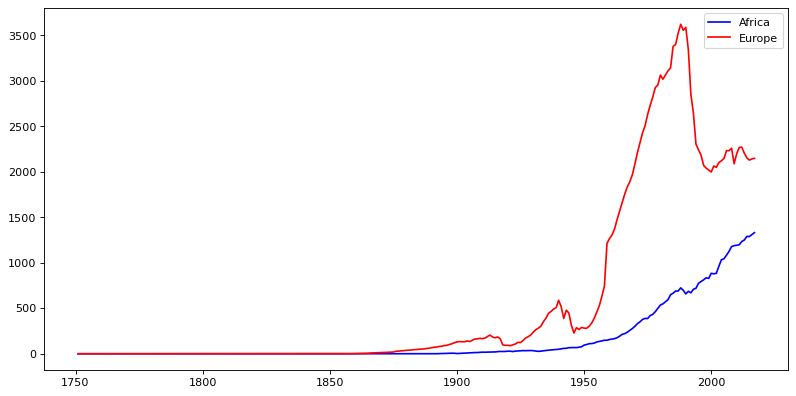

In [120]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(co2data[co2data["Entity"] == "Africa"].Year, 
         co2data[co2data["Entity"] == "Africa"]["CO₂ emissions (Kilo-tonnes )"], 
         color = "b", label = "Africa")
plt.plot(co2data[co2data["Entity"] == "Europe (other)"].Year, 
         co2data[co2data["Entity"] == "Europe (other)"]["CO₂ emissions (Kilo-tonnes )"], 
         color = "r", label = "Europe")

plt.legend()